In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
algo_csv = Path('algo_returns.csv')
sp_tsx_csv = Path('sp_tsx_history.csv')
whale_csv = Path('whale_returns.csv')

In [3]:
algo_df = pd.read_csv(algo_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_df.isnull().sum()
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [4]:
whale_df = pd.read_csv(whale_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_df.isnull().sum()
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
sp_tsx_df = pd.read_csv(sp_tsx_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp_tsx_df.isnull().sum()
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")
sp_tsx_returns = sp_tsx_df.pct_change()
sp_tsx_returns.dropna(inplace=True)
sp_tsx_returns.rename(columns={"Close":"SP/TSX Daily Returns"}, inplace=True)
sp_tsx_returns.head()

,SP/TSX Daily Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [6]:
combined_inv_data = pd.concat([sp_tsx_returns, whale_df, algo_df], axis=1, join='outer')
combined_inv_data.dropna(inplace=True)
combined_inv_data.sort_index(ascending=True, inplace=True)
combined_inv_data.head()

,SP/TSX Daily Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.003371,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001344,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.009972,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,-0.006555,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


In [7]:
combined_inv_data.columns

Index(['SP/TSX Daily Returns', 'SOROS FUND MANAGEMENT LLC',
       'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC',
       'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2'],
      dtype='object')

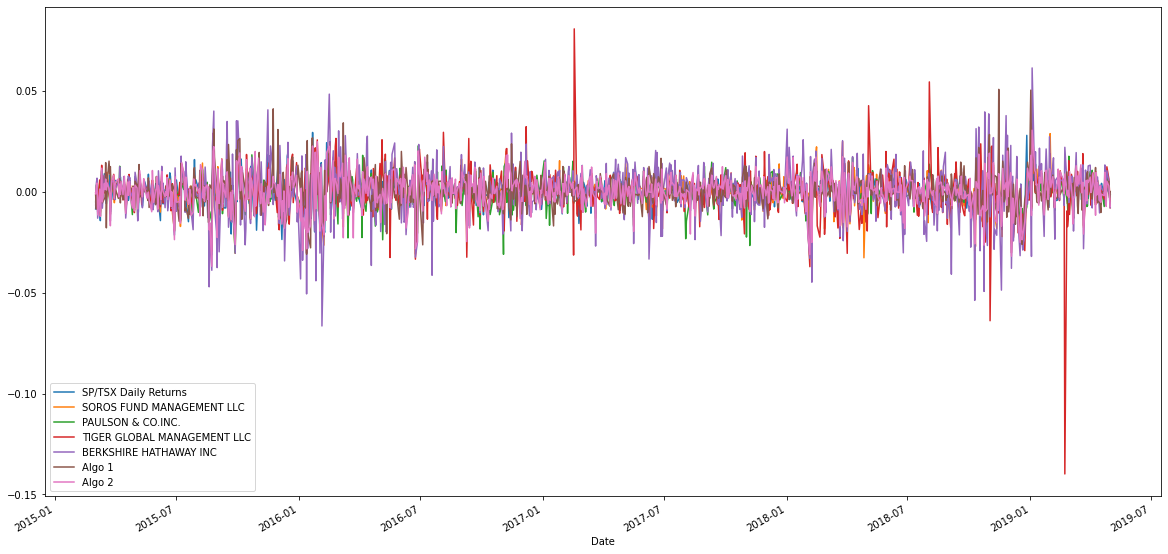

In [8]:
combined_inv_data.plot(figsize=(20,10))

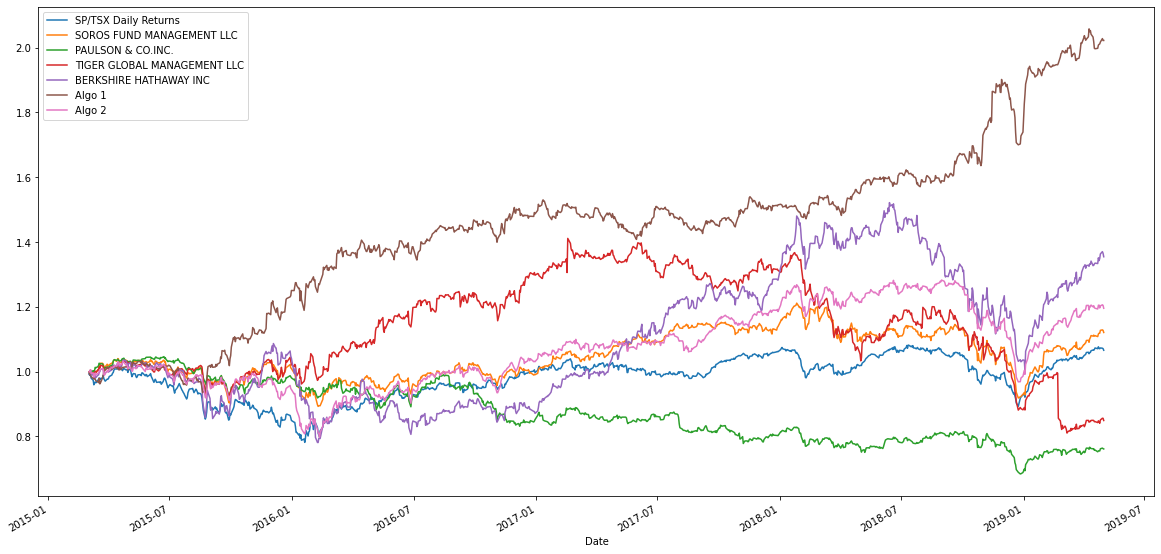

In [9]:
cumulative_combined_inv_data = (1 + combined_inv_data).cumprod()
cumulative_combined_inv_data.plot(figsize=(20,10))

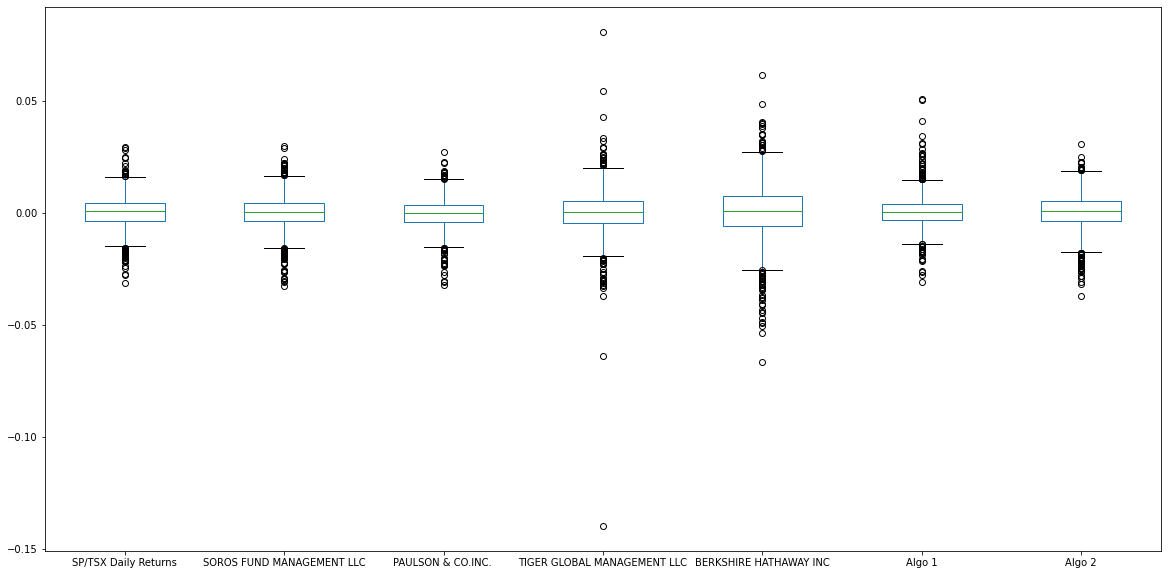

In [10]:
combined_inv_data.plot.box(figsize=(20,10))

In [11]:
std_combined_inv_data = combined_inv_data.std()
std_combined_inv_data.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
SP/TSX Daily Returns           0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

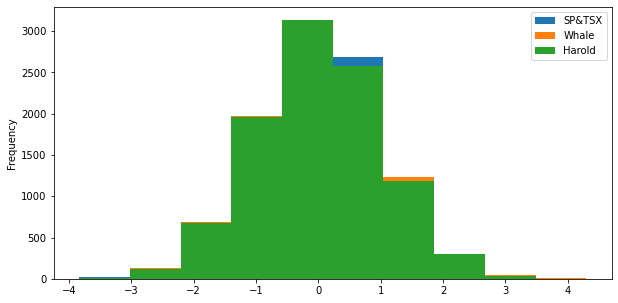

In [12]:
sp_tsx_std = combined_inv_data["SP/TSX Daily Returns"].std()
whale_std = combined_inv_data.std()
algo_cum = (1+algo_df).cumprod()
algo_std = algo_cum.std()

sp_tsx_std = np.random.normal(scale=1.0, size=10000)
whale_std = np.random.normal(scale=1.0, size=10000)
algo_std = np.random.normal(scale=1.0, size=10000)

portfolio_std = pd.DataFrame({
    "SP&TSX": sp_tsx_std,
    "Whale": whale_std,
    "Harold": algo_std
})

portfolio_std.plot.hist(figsize=(10,5))

In [13]:
annual_std_combined_inv_data = std_combined_inv_data * np.sqrt(252)
annual_std_combined_inv_data.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
SP/TSX Daily Returns           0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

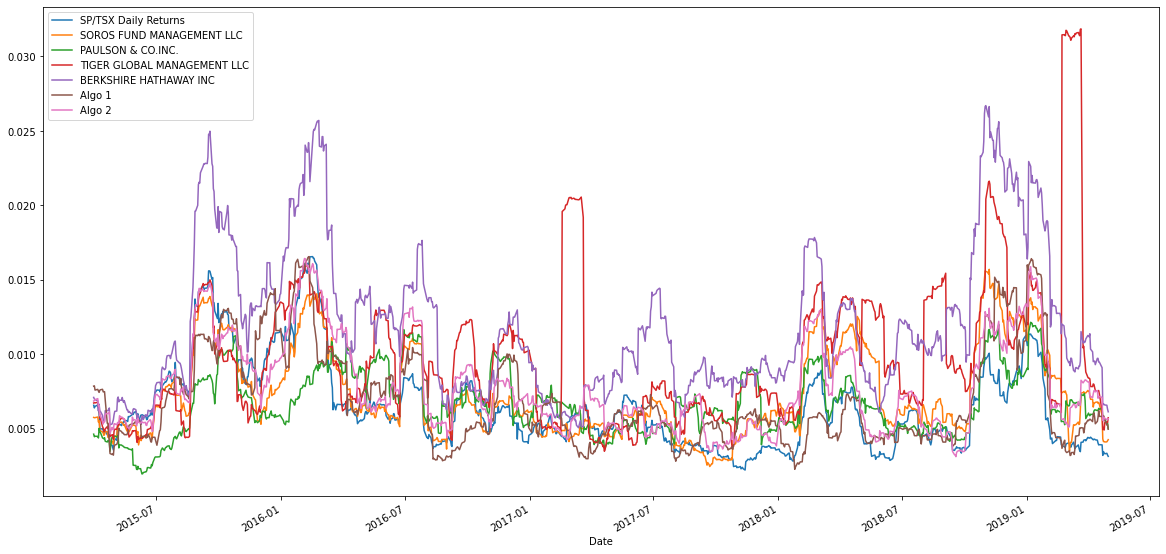

In [14]:
tri_weekly_avg = combined_inv_data.rolling(window=21).std()
tri_weekly_avg.plot(figsize=(20,10))

In [15]:
combined_inv_data.corr()

,SP/TSX Daily Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SP/TSX Daily Returns,1.000000,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370
SOROS FUND MANAGEMENT LLC,0.673930,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667
PAULSON & CO.INC.,0.486511,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015
TIGER GLOBAL MANAGEMENT LLC,0.440583,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689
BERKSHIRE HATHAWAY INC,0.557250,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609
Algo 1,0.310276,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455
Algo 2,0.737370,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000


In [16]:
variance_SP_tsx = combined_inv_data['SP/TSX Daily Returns'].var()
variance_SP_tsx

4.9479515915131015e-05

In [17]:
covariance_brk = combined_inv_data['BERKSHIRE HATHAWAY INC'].cov(combined_inv_data['SP/TSX Daily Returns'])
covariance_srs = combined_inv_data['SOROS FUND MANAGEMENT LLC'].cov(combined_inv_data['SP/TSX Daily Returns'])
covariance_paul = combined_inv_data['PAULSON & CO.INC. '].cov(combined_inv_data['SP/TSX Daily Returns'])
covariance_tig = combined_inv_data['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_inv_data['SP/TSX Daily Returns'])
covariance_algo_1 = combined_inv_data['Algo 1'].cov(combined_inv_data['SP/TSX Daily Returns'])
covariance_algo_2 = combined_inv_data['Algo 2'].cov(combined_inv_data['SP/TSX Daily Returns'])

In [18]:
market_beta = 1.0
brk_beta = covariance_brk/variance_SP_tsx
srs_beta = covariance_srs/variance_SP_tsx
paul_beta = covariance_paul/variance_SP_tsx
tig_beta = covariance_tig/variance_SP_tsx
algo_1_beta = covariance_algo_1/variance_SP_tsx
algo_2_beta = covariance_algo_2/variance_SP_tsx

print(f"Berkshire Hathaway's portfolio beta is: {brk_beta}")
print(f"George Soros' portfolio beta is: {srs_beta}")
print(f"Paulson & Co's portfolio beta is: {paul_beta}")
print(f"Tiger Golbal's portfolio beta is: {tig_beta}")
print(f"Algorithm 1's portfolio beta is: {algo_1_beta}")
print(f"Algorithm 2's portfolio beta is: {algo_2_beta}")

Berkshire Hathaway's portfolio beta is: 1.016043909106364
George Soros' portfolio beta is: 0.7499446668435368
Paulson & Co's portfolio beta is: 0.4829254312956285
Tiger Golbal's portfolio beta is: 0.6816404904244667
Algorithm 1's portfolio beta is: 0.33474459081856983
Algorithm 2's portfolio beta is: 0.8728267344999631


In [19]:
rolling_covariance_brk = combined_inv_data['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_inv_data['SP/TSX Daily Returns'])
rolling_covariance_srs = combined_inv_data['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_inv_data['SP/TSX Daily Returns'])
rolling_covariance_paul = combined_inv_data['PAULSON & CO.INC. '].rolling(window=60).cov(combined_inv_data['SP/TSX Daily Returns'])
rolling_covariance_tig = combined_inv_data['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_inv_data['SP/TSX Daily Returns'])
rolling_covariance_algo_1 = combined_inv_data['Algo 1'].rolling(window=60).cov(combined_inv_data['SP/TSX Daily Returns'])
rolling_covariance_algo_2 = combined_inv_data['Algo 2'].rolling(window=60).cov(combined_inv_data['SP/TSX Daily Returns'])

rolling_variance_SP_tsx = combined_inv_data['SP/TSX Daily Returns'].rolling(window=60).var()

rolling_brk_beta = rolling_covariance_brk/rolling_variance_SP_tsx
rolling_srs_beta = rolling_covariance_srs/rolling_variance_SP_tsx
rolling_paul_beta = rolling_covariance_paul/rolling_variance_SP_tsx
rolling_tig_beta = rolling_covariance_tig/rolling_variance_SP_tsx
rolling_algo_1_beta = rolling_covariance_algo_1/rolling_variance_SP_tsx
rolling_algo_2_beta = rolling_covariance_algo_2/rolling_variance_SP_tsx

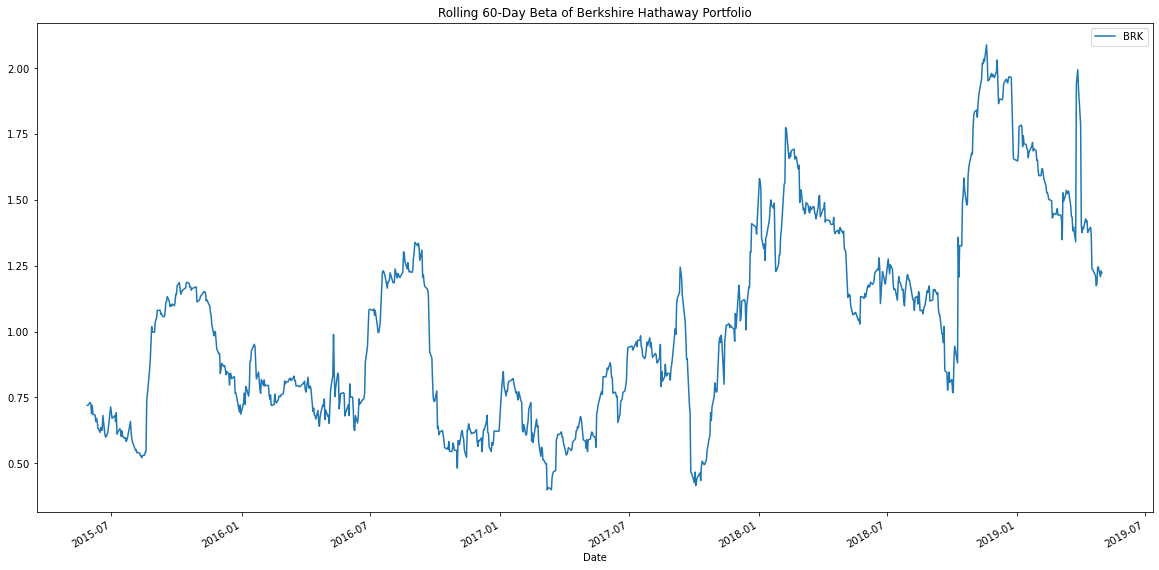

In [20]:
ax = rolling_brk_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Berkshire Hathaway Portfolio")
# rolling_srs_beta.plot(ax=ax)
# rolling_paul_beta.plot(ax=ax)
# rolling_tig_beta.plot(ax=ax)
# rolling_algo_1_beta.plot(ax=ax)
# rolling_algo_2_beta.plot(ax=ax)

# ax.legend(["BRK", "SRS", "PAUL","TIG","Algo_1","Alog_2"])
ax.legend(["BRK"])

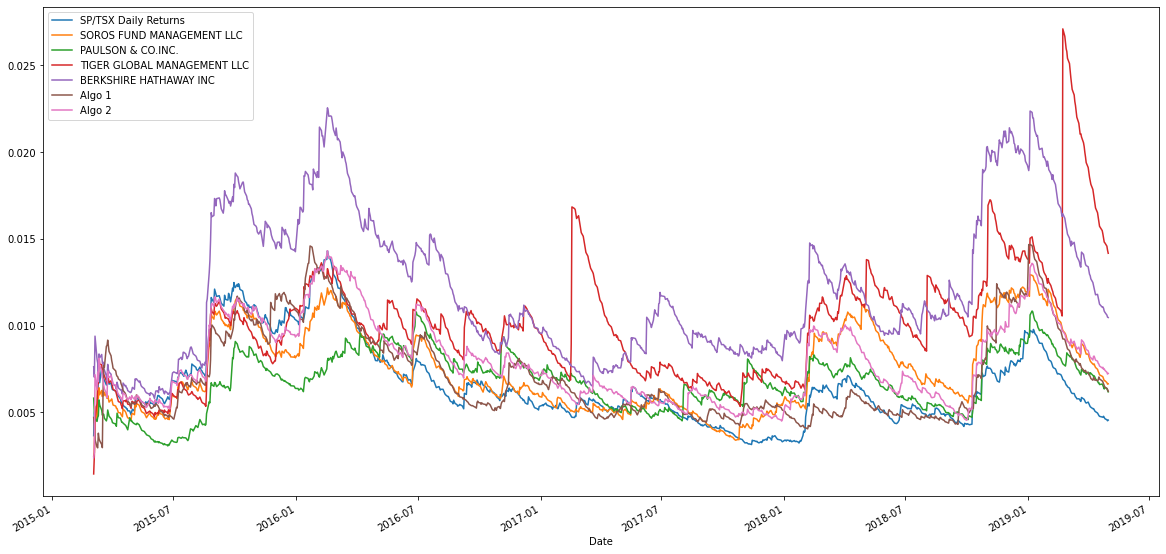

In [21]:
# times = ['2020-01-01', '2020-01-03', '2020-01-10', '2020-01-15', '2020-01-17']
combined_inv_data.ewm(halflife=21).std().plot(figsize=(20,10))

In [22]:
sharpe_ratios = (combined_inv_data.mean() * 252) / (combined_inv_data.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.491514
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
SP/TSX Daily Returns           0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
dtype: float64

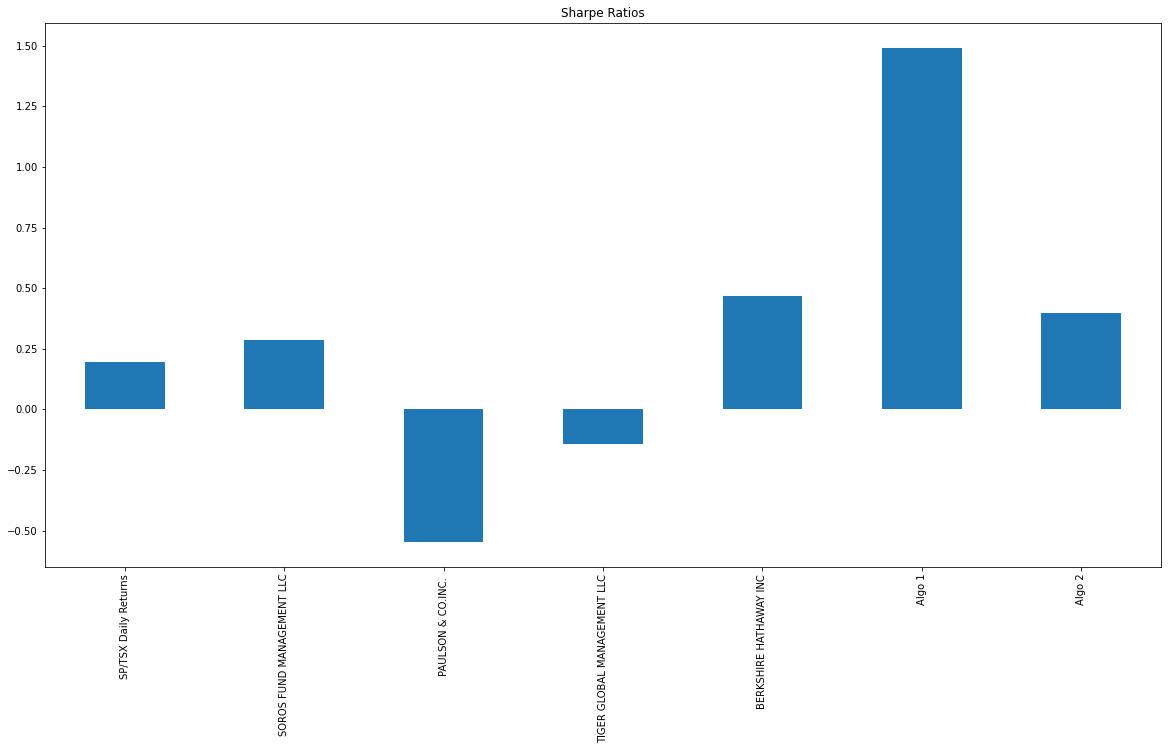

In [23]:
sharpe_ratios.plot.bar(title='Sharpe Ratios', figsize=(20,10))

In [24]:
print(f"Algorithm 1 outperforms both the S&P and TSX by a factor of ~t7.6 in sharpe ratios. It's beta indicates that is is safer and positively but very loosely correlated to the overall market index. Furthermore, the risk is about the same as the market. It's a huge win! It is approximately 4 times riskier than the market index. Algorithm 2 outperforms the market index by a factor of 2 in its sharpe ratio. It is, however, more closely correlated to the market index. This in turn accounts for the risk being just less than twice the market index's risk at a standard deviation of ~1.8. Well done Harold for creating these trading algorithms!")


Algorithm 1 outperforms both the S&P and TSX by a factor of 7 in sharpe ratios. It's beta indicates that is is safer and positively but very loosely correlated to the overall market index. Furthermore, the risk is about the same as the market. It's a huge win! It is approximately 4 times riskier than the market index. Algorithm 2 outperforms the market index by a factor of 2 in its sharpe ratio. It is, however, more closely correlated to the market index. This in turn accounts for the risk being just less than twice the market index's risk at a standard deviation of ~1.8. Well done Harold for creating these trading algorithms!


In [25]:
print(f'Personal Portfolio')

Personal Portfolio


In [26]:
l_csv = Path('I_historical.csv')
otex_csv = Path('otex_historical.csv')
shop_csv = Path('shop_historical.csv')

In [27]:
l_df = pd.read_csv(l_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
l_df.isnull().sum()
l_df.dropna(inplace=True)
l_df.drop(columns=("Symbol"), inplace=True)
l_df.rename(columns={"Close":"Loblaws"}, inplace=True)
l_df.head()

,Loblaws
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [28]:
otex_df = pd.read_csv(otex_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
otex_df.isnull().sum()
otex_df.dropna(inplace=True)
otex_df.rename(columns={"Close":"Otex"}, inplace=True)
otex_df.drop(columns=("Symbol"), inplace=True)
otex_df.head()

,Otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [29]:
shop_df = pd.read_csv(shop_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
shop_df.isnull().sum()
shop_df.dropna(inplace=True)
shop_df.drop(columns=("Symbol"), inplace=True)
shop_df.rename(columns={"Close":"Shopify"}, inplace=True)
shop_df.head()

,Shopify
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [30]:
personal_df = pd.concat([shop_df, otex_df,l_df], axis=1, join='inner')
personal_df.rename(columns={"Close":"Loblaws Returns"}, inplace=True)
personal_df.rename(columns={"Otex":"Otex Returns"}, inplace=True)
personal_df.rename(columns={"Shopify":"Shopify Returns"}, inplace=True)
personal_df.head()

,Shopify Returns,Otex Returns,Loblaws
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


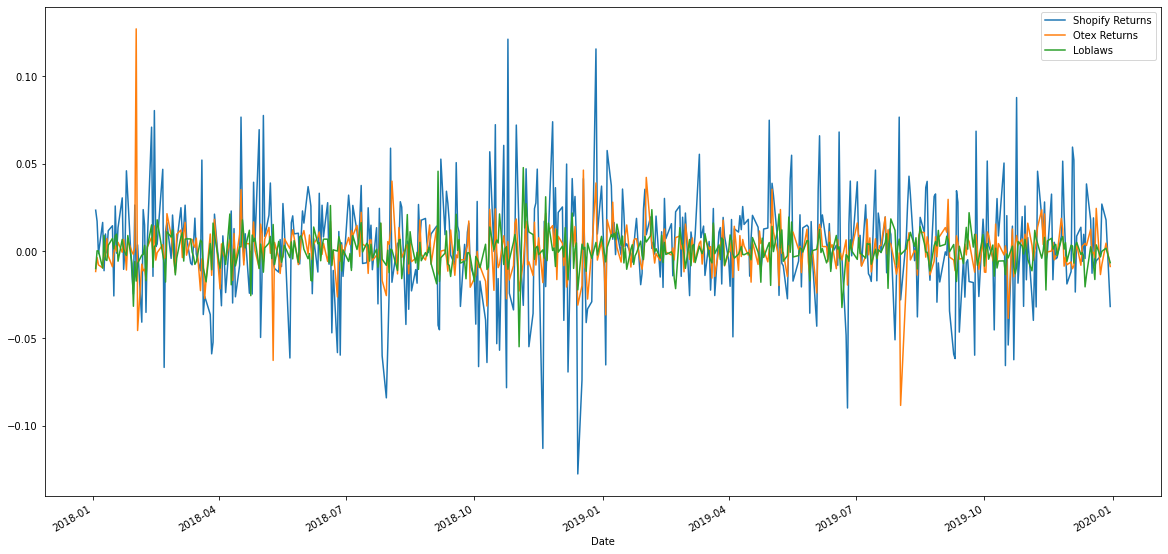

In [46]:
personal_returns = personal_df.pct_change()
personal_returns.dropna(inplace=True)
personal_returns.plot(figsize=(20,10))

In [47]:
personal_SPTSX_returns = pd.concat([personal_returns, combined_inv_data], axis='columns', join='inner')
personal_SPTSX_returns.drop(columns=['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2'], inplace=True)
personal_SPTSX_returns.head()

,Shopify Returns,Otex Returns,Loblaws,SP/TSX Daily Returns
Date,,,,
2018-01-03,0.023398,-0.011703,-0.010002,0.003774
2018-01-04,0.017092,-0.003715,0.000174,0.002528
2018-01-05,-0.001455,-0.007924,0.000000,-0.003869
2018-01-08,0.016392,-0.009631,-0.009753,-0.001944
2018-01-09,-0.011254,-0.000712,0.008969,0.000097


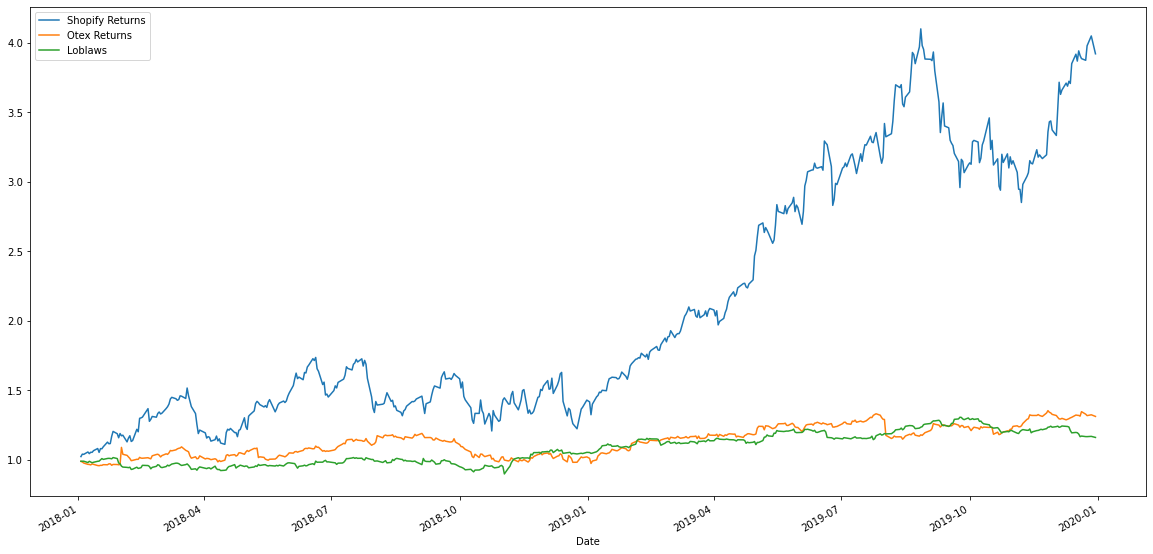

In [48]:
personal_cum = (1+personal_returns).cumprod()
personal_cum.plot(figsize=(20,10))

In [34]:
weights = [0.3, 0.3, 0.3]
portfolio_returns = personal_returns.dot(weights)
portfolio_returns.head()

Date
2018-01-03    0.000508
2018-01-04    0.004065
2018-01-05   -0.002814
2018-01-08   -0.000897
2018-01-09   -0.000899
dtype: float64

In [35]:
total_personal_returns = pd.concat([portfolio_returns, personal_SPTSX_returns], axis=1, join="inner")
total_personal_returns.dropna().head()

,0,Shopify Returns,Otex Returns,Loblaws,SP/TSX Daily Returns
Date,,,,,
2018-01-03,0.000508,0.023398,-0.011703,-0.010002,0.003774
2018-01-04,0.004065,0.017092,-0.003715,0.000174,0.002528
2018-01-05,-0.002814,-0.001455,-0.007924,0.000000,-0.003869
2018-01-08,-0.000897,0.016392,-0.009631,-0.009753,-0.001944
2018-01-09,-0.000899,-0.011254,-0.000712,0.008969,0.000097


In [36]:
total_personal_returns.rename(columns={0:"Personal Portfolio Returns"}, inplace=True)
total_personal_returns.head()

,Personal Portfolio Returns,Shopify Returns,Otex Returns,Loblaws,SP/TSX Daily Returns
Date,,,,,
2018-01-03,0.000508,0.023398,-0.011703,-0.010002,0.003774
2018-01-04,0.004065,0.017092,-0.003715,0.000174,0.002528
2018-01-05,-0.002814,-0.001455,-0.007924,0.000000,-0.003869
2018-01-08,-0.000897,0.016392,-0.009631,-0.009753,-0.001944
2018-01-09,-0.000899,-0.011254,-0.000712,0.008969,0.000097


In [38]:
annual_portfolio_returns_std = total_personal_returns.std() * np.sqrt(252)
annual_portfolio_returns_std.sort_values(ascending=False)

Shopify Returns               0.504079
Otex Returns                  0.225703
Personal Portfolio Returns    0.201911
Loblaws                       0.162907
SP/TSX Daily Returns          0.099121
dtype: float64

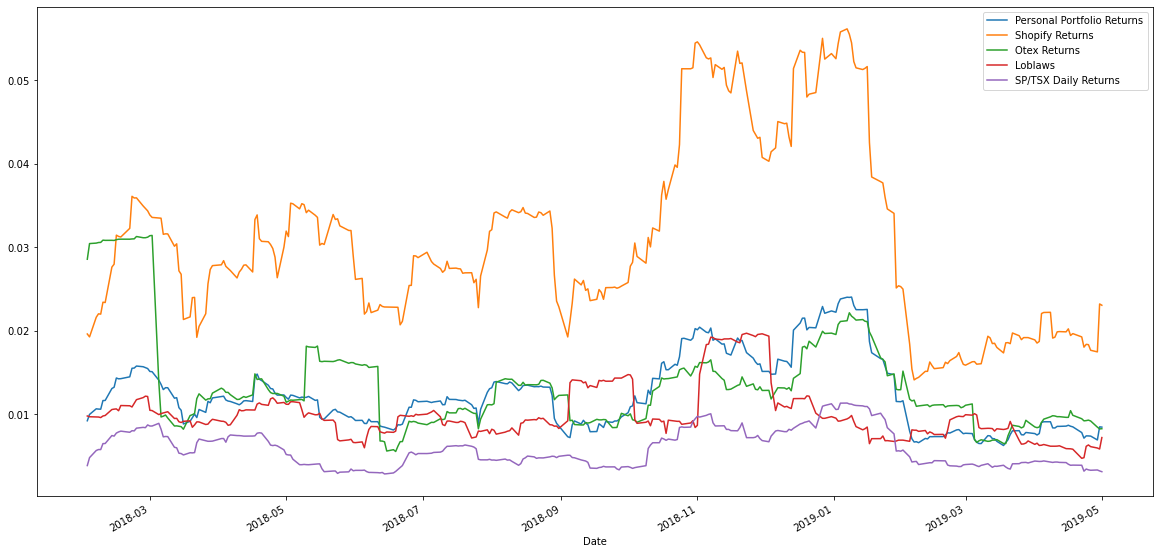

In [49]:
rolling_portfolio_returns_std = total_personal_returns.rolling(window=21).std().plot(figsize=(20,10))

In [51]:
total_personal_returns.corr()

,Personal Portfolio Returns,Shopify Returns,Otex Returns,Loblaws,SP/TSX Daily Returns
Personal Portfolio Returns,1.000000,0.908990,0.673651,0.385428,0.579228
Shopify Returns,0.908990,1.000000,0.395357,0.113386,0.462264
Otex Returns,0.673651,0.395357,1.000000,0.174320,0.450590
Loblaws,0.385428,0.113386,0.174320,1.000000,0.338382
SP/TSX Daily Returns,0.579228,0.462264,0.450590,0.338382,1.000000


In [52]:
portfolio_covariance = total_personal_returns["Personal Portfolio Returns"].rolling(window=21).cov(total_personal_returns["SP/TSX Daily Returns"])

variance_SP_tsx = total_personal_returns['SP/TSX Daily Returns'].rolling(window=21).var()

personal_portfolio_beta = portfolio_covariance/variance_SP_tsx
avg_beta = personal_portfolio_beta.dropna().mean()
print(f"The Average Beta for the weighted forfolio of Loblaws, Otex and Shopify is: {avg_beta}.")
      

The Average Beta for the weighted forfolio of Loblaws, Otex and Shopify is: 1.040883510004099.


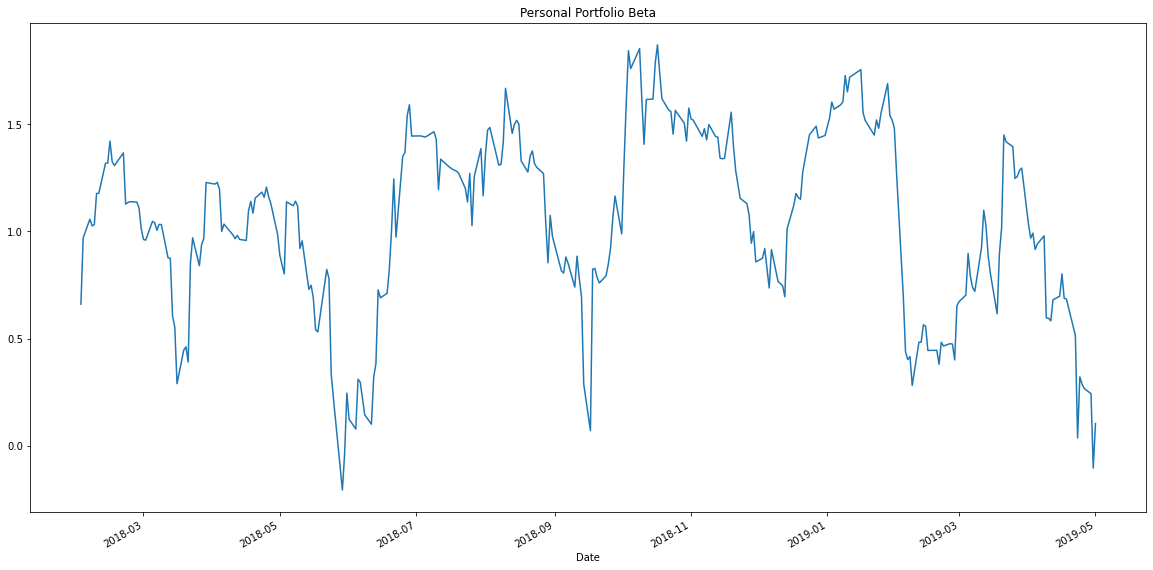

In [53]:
personal_portfolio_beta.plot(title="Personal Portfolio Beta", figsize=(20,10))

In [43]:
sharpe_ratios_personal = (total_personal_returns.mean() * 252) / (total_personal_returns.std() * np.sqrt(252))
sharpe_ratios_personal

Personal Portfolio Returns    1.564547
Shopify Returns               1.575294
Otex Returns                  0.762776
Loblaws                       0.532599
SP/TSX Daily Returns          0.034651
dtype: float64

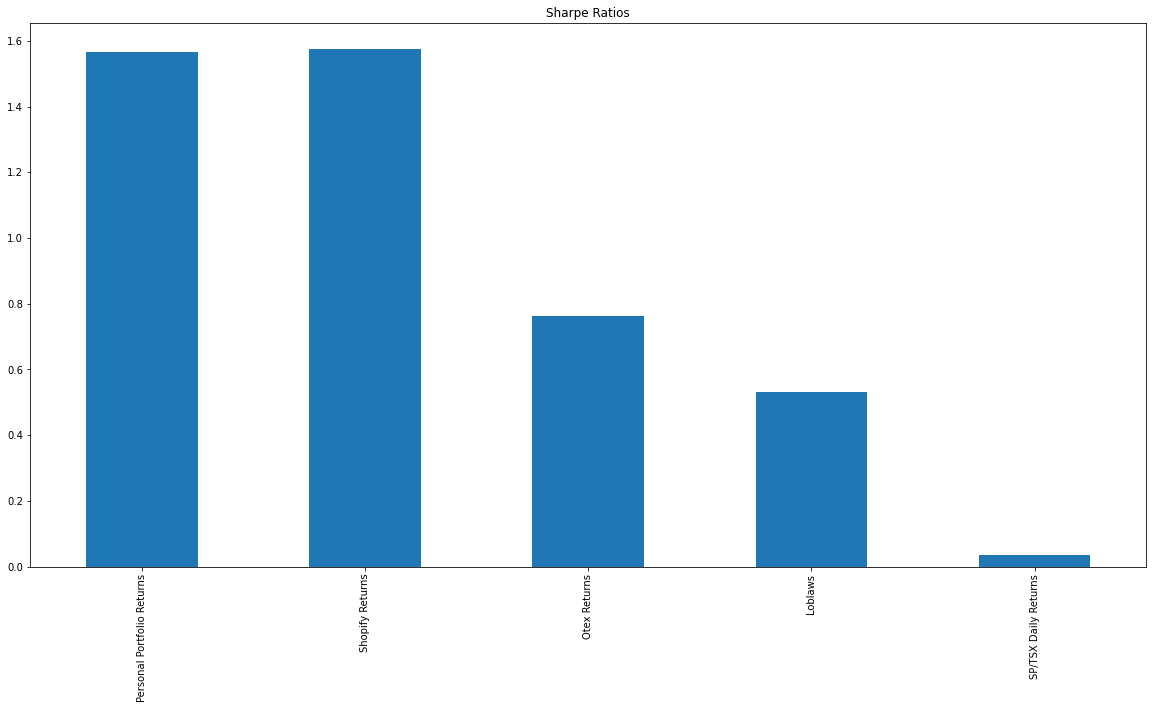

In [44]:
sharpe_ratios_personal.plot.bar(figsize=(20,10), title=("Sharpe Ratios"))

In [45]:
f"The weighted portfolio of Shopify, Otex and Loblaws is twice as volatile as the overall market, however not very closely correlated with the overall market index. Furthermore, the sharpe ratio is 47 times higher the general market index based off of the portfolio of these three stocks weighted equally. Therefore, one would recommend incorportaing these three stocks into their portfolio."


'The weighted portfolio of Shopify, Otex and Loblaws is twice as volatile as the overall market, however not very closely correlated with the overall market index. Furthermore, the sharpe ratio is 47 times higher the general market index based off of the portfolio of these three stocks weighted equally. Therefore, one would recommend incorportaing these three stocks into their portfolio.'